In [1]:
from grey_model import GreyModel
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u

/Users/vernica/GitHub/project-10/grey_model/eos.py:367: RuntimeWarning: overflow encountered in scalar divide
  f_e = n_e/n_h
/Users/vernica/GitHub/project-10/grey_model/eos.py:393: RuntimeWarning: divide by zero encountered in scalar divide
  P = rho/mu*(c.k_B*T*u.K/u.u).cgs.value
/Users/vernica/GitHub/project-10/grey_model/eos.py:394: RuntimeWarning: divide by zero encountered in log
  return np.log(P_0_cgs/P)
/Users/vernica/GitHub/project-10/grey_model/eos.py:708: RuntimeWarning: overflow encountered in scalar divide
  cP_tab[i,j] = ((Ui_plus - Ui)/dT).cgs.value + 5/2*k_b_u_cgs*Q_tab[i,j]/mu_tab[i,j]
/Users/vernica/GitHub/project-10/grey_model/eos.py:708: RuntimeWarning: overflow encountered in scalar multiply
  cP_tab[i,j] = ((Ui_plus - Ui)/dT).cgs.value + 5/2*k_b_u_cgs*Q_tab[i,j]/mu_tab[i,j]


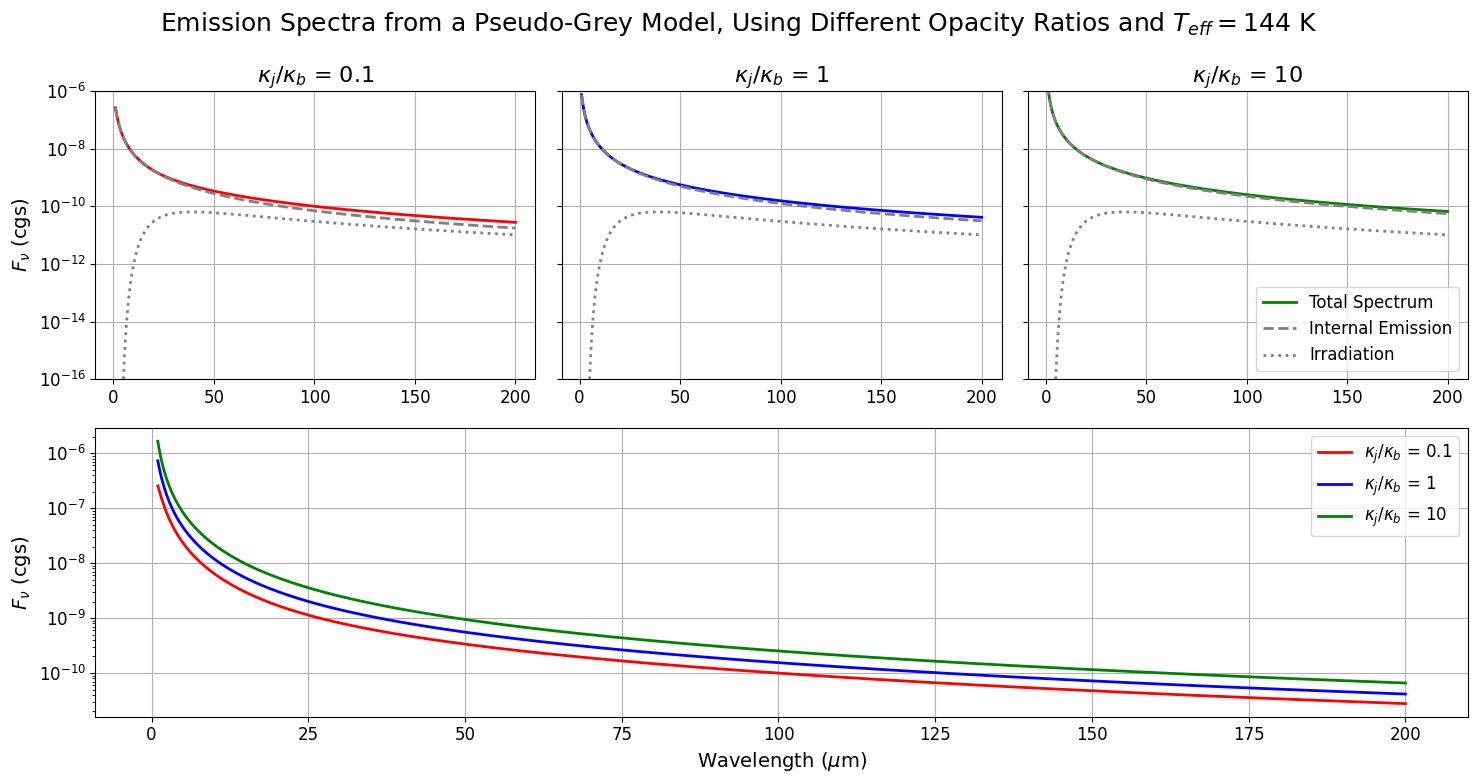

In [ ]:
kappa_ratios = [0.1, 1, 10]
cols = ['r', 'b', 'g']
fig = plt.figure(figsize=(15, 8))

# Create grid: 2 rows, 3 columns with shared y-axis for top row
# Top row: 3 individual plots with shared y-axis
axes_top = []
for i in range(3):
    if i == 0:
        ax = plt.subplot(2, 3, i+1)
        axes_top.append(ax)
    else:
        ax = plt.subplot(2, 3, i+1, sharey=axes_top[0])
        axes_top.append(ax)

ax_bottom = plt.subplot(2, 1, 2)

total_spectra = []
wavelengths = None

for i, kappa_ratio in enumerate(kappa_ratios):
    model = GreyModel(kappa_ratio=kappa_ratio, D=1e8)
    spec = model.final_spectrum
    local = model.local_spectrum
    irr = model.irradiated_spectrum
    wavelength = (c.c/model.freqs).to_value(u.um)

    total_spectra.append(spec)
    if wavelengths is None:
        wavelengths = wavelength
    
    # Top row individual plots
    axes_top[i].semilogy(wavelength, spec, cols[i], linewidth=2, label='Total Spectrum')
    axes_top[i].semilogy(wavelength, local, 'gray', linewidth=2, label='Internal Emission', linestyle='--')
    axes_top[i].semilogy(wavelength, irr, 'gray', linewidth=2, label='Irradiation', linestyle=':')
    axes_top[i].set_title(f'$\\kappa_j/\\kappa_b$ = {kappa_ratio}')
    axes_top[i].grid()
    axes_top[i].set_ylim(10**-16, 10**-6)
    axes_top[i].tick_params(axis='x', which='major', labelsize=12)
    
    if i == 0:
        axes_top[i].set_ylabel(r'$F_\nu$ (cgs)')
        axes_top[i].tick_params(axis='y', which='major', labelsize=12)
    else:
        # Hide y-axis tick labels for middle and right plots
        axes_top[i].tick_params(axis='y', which='major', labelleft=False)

# Bottom plot: all total spectra together
colors = ['red', 'blue', 'green']
for i, (kappa_ratio, spec) in enumerate(zip(kappa_ratios, total_spectra)):
    ax_bottom.semilogy(wavelengths, spec, color=colors[i], linewidth=2, 
                      label=f'$\\kappa_j/\\kappa_b$ = {kappa_ratio}')

ax_bottom.set_xlabel(r'Wavelength ($\mu$m)')
ax_bottom.set_ylabel(r'$F_\nu$ (cgs)')
ax_bottom.legend()
ax_bottom.grid()
ax_bottom.tick_params(axis='both', which='major', labelsize=12)

axes_top[2].legend(loc='lower right')

fig.suptitle('Emission Spectra from a Pseudo-Grey Model, Using Different Opacity Ratios and $T_{eff}=144$ K', fontsize=18)
plt.tight_layout()
plt.show()

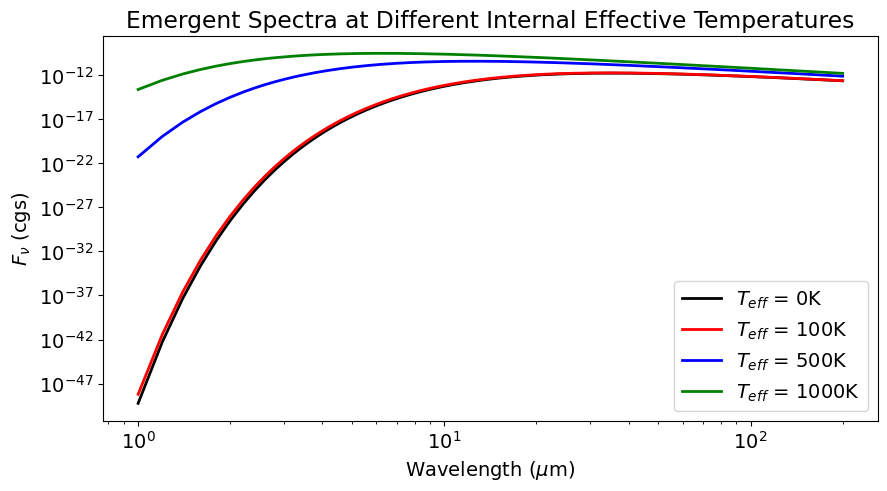

In [ ]:
temperatures = [0, 100, 500, 1000]
cols = ['k', 'r', 'b', 'g']
plt.figure(figsize=(10,5))

for i, t in enumerate(temperatures):
    model = GreyModel(Teff=t, kappa_ratio=1, D=1e12, include_molecules=False)
    spec = model.final_spectrum
    local = model.local_spectrum
    irr = model.irradiated_spectrum
    wavelength = (c.c/model.freqs).to_value(u.um)
    
    # Top row individual plots
    plt.loglog(wavelength, spec, color=cols[i], linewidth=2, label=f'$T_{{eff}}$ = {t}K')
    #plt.xlim(0,50)
    plt.legend()
    plt.title('Emergent Spectra at Different Internal Effective Temperatures')
    plt.xlabel(r'Wavelength ($\mu$m)')
    plt.ylabel(r'$F_\nu$ (cgs)')

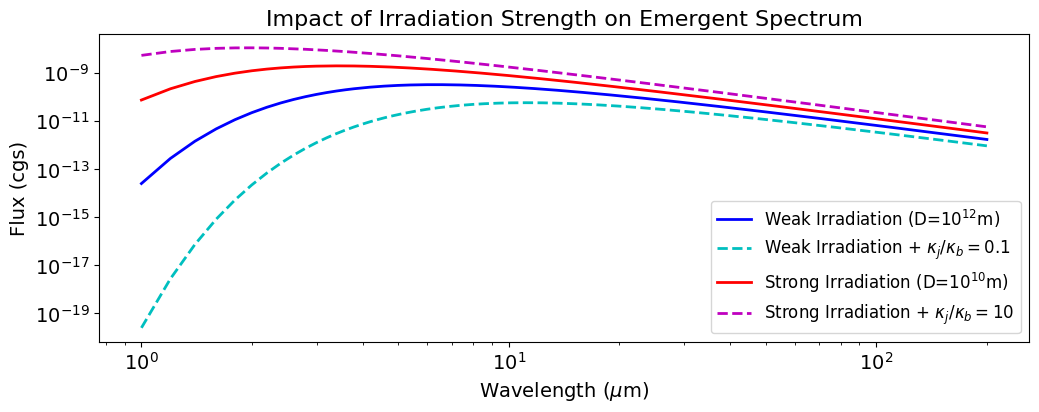

In [ ]:
# looking at the impacts of strong irradiation

model_weak = GreyModel(Teff=1000, kappa_ratio=1, D=1e12, include_molecules=False)
model_weak_kappa = GreyModel(Teff=1000, kappa_ratio=0.1, D=1e12, include_molecules=False)
model_strong = GreyModel(Teff=1000, kappa_ratio=1, D=1e10, include_molecules=False)
model_strong_kappa = GreyModel(Teff=1000, kappa_ratio=10, D=1e10, include_molecules=False)

plt.figure(figsize=(12,4))
plt.loglog((c.c/model_weak.freqs).to_value(u.um), model_weak.final_spectrum, 'b-', linewidth=2, label='Weak Irradiation (D=$10^{12}$m)')
plt.loglog((c.c/model_weak_kappa.freqs).to_value(u.um), model_weak_kappa.final_spectrum, 'c--', linewidth=2, label='Weak Irradiation + $\\kappa_j/\\kappa_b=0.1$')
plt.loglog((c.c/model_strong.freqs).to_value(u.um), model_strong.final_spectrum, 'r-', linewidth=2, label='Strong Irradiation (D=$10^{10}$m)')
plt.loglog((c.c/model_strong_kappa.freqs).to_value(u.um), model_strong_kappa.final_spectrum, 'm--', linewidth=2, label='Strong Irradiation + $\\kappa_j/\\kappa_b=10$')
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel('Flux (cgs)')
plt.legend()
plt.title('Impact of Irradiation Strength on Emergent Spectrum')
#plt.xlim(0,50)
#plt.grid()
plt.show()

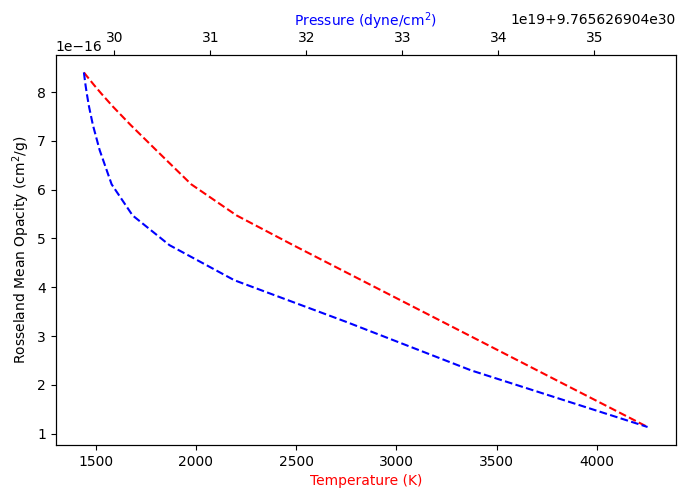

In [2]:
m = GreyModel(D=1e10)
p,t,r,k = m.load_opacities()

# Create single plot with dual x-axes and better spacing
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
fig.subplots_adjust(top=0.80, bottom=0.15)  # More space for top axis

# Main plot with temperature (linear) on bottom x-axis
ax1.plot(t, r, 'r--')
ax1.set_xlabel('Temperature (K)', color='r')
ax1.set_ylabel(r'Rosseland Mean Opacity (cm$^2$/g)')

# Create second x-axis on top for pressure (log scale)
ax2 = ax1.twiny()
ax2.plot(p, r, 'b--')  # Invisible plot to set up the axis
ax2.set_xlabel(r'Pressure (dyne/cm$^2$)', color='b')

plt.show()

In [3]:
t, s = m.make_spec("internal")
plt.figure(figsize=(8,4))
for i in range(49):
    plt.loglog((c.c/m.freqs).to_value(u.um), s[:,i], 'grey', linewidth=0.5)

plt.loglog((c.c/m.freqs).to_value(u.um), s[:,-1], 'grey', linewidth=0.5, label='Contributing Layers')
plt.loglog((c.c/m.freqs).to_value(u.um), m.local_spectrum, 'r-', linewidth=2, label='Total Internal Emission')
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel('Flux (cgs)')
plt.legend()

ValueError: too many values to unpack (expected 2)